###                           Probability Image Processing Assignment

We are importing Image from an online Source

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

!wget https://i.ibb.co/X2YzXB1/Panda-Copy.png
!wget https://i.ibb.co/dbVnCdt/Girl-Copy.png
!wget https://i.ibb.co/gTpPtsq/Campus-Copy.png
!wget https://i.ibb.co/mh43mwH/Elon-Copy.png
!wget https://i.ibb.co/x5DyXvr/imageA.png
!wget https://i.ibb.co/r6FngpG/imageB.png

--2024-03-05 03:18:59--  https://i.ibb.co/X2YzXB1/Panda-Copy.png
Resolving i.ibb.co (i.ibb.co)... 172.96.161.6, 104.194.8.143, 104.194.8.143, ...
Connecting to i.ibb.co (i.ibb.co)|172.96.161.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 188201 (184K) [image/png]
Saving to: ‘Panda-Copy.png’

Panda-Copy.png      100%[===================>] 183.79K   420KB/s    in 0.4s    

2024-03-05 03:19:01 (420 KB/s) - ‘Panda-Copy.png’ saved [188201/188201]

--2024-03-05 03:19:01--  https://i.ibb.co/dbVnCdt/Girl-Copy.png
Resolving i.ibb.co (i.ibb.co)... 172.96.161.6, 104.194.8.143, 104.194.8.143, ...
Connecting to i.ibb.co (i.ibb.co)|172.96.161.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 286737 (280K) [image/png]
Saving to: ‘Girl-Copy.png’

Girl-Copy.png       100%[===================>] 280.02K   549KB/s    in 0.5s    

2024-03-05 03:19:02 (549 KB/s) - ‘Girl-Copy.png’ saved [286737/286737]

--2024-03-05 03:19:02--  https://i.ibb.co/gTpPtsq/C

In the following Assignment we explored the domain of Image Processing in which we learned how to do 'Image Equalization', 'Matching of a source Image and a Reference Image'

Here, we are converting our image from 3 dimensional array to two dimensional array. Using cv library cv.imread function

In [ ]:
panda_1=cv.imread('Panda-Copy.png',0)
girl_1=cv.imread('Girl-Copy.png',0)
campus_1=cv.imread('Campus-Copy.png',0)
elon_1=cv.imread('Elon-Copy.png',0)
sample_11=cv.imread('imageA.png',0)
sample_22=cv.imread('imageB.png',0)

Range of Intensity values is from 0 to 255

In [ ]:
intensity_values=np.arange(256)

Here we are showing all the images we are going to match

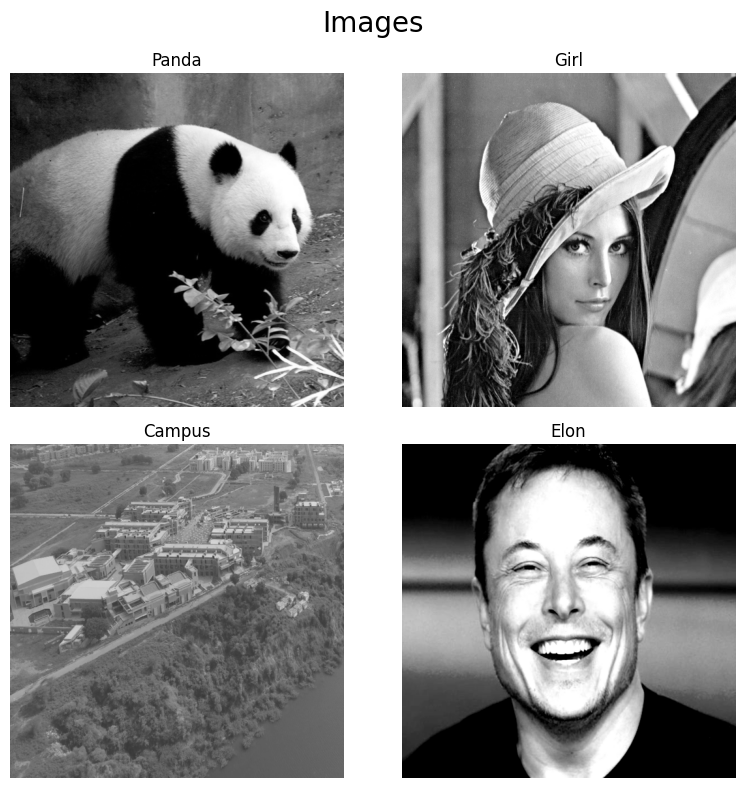

In [ ]:
fig,ax= plt.subplots(nrows=2,ncols=2,figsize=(8,8))

ax[0][0].imshow(cv.cvtColor(panda_1, cv.COLOR_BGR2RGB))
ax[0][0].axis('off')
ax[0][0].set_title('Panda')
ax[0][1].imshow(cv.cvtColor(girl_1, cv.COLOR_BGR2RGB))
ax[0][1].axis('off')
ax[0][1].set_title('Girl')

ax[1][0].imshow(cv.cvtColor(campus_1, cv.COLOR_BGR2RGB))
ax[1][0].axis('off')
ax[1][0].set_title('Campus')
ax[1][1].imshow(cv.cvtColor(elon_1, cv.COLOR_BGR2RGB))
ax[1][1].axis('off')
ax[1][1].set_title('Elon')

fig.suptitle('Images', fontsize=20)
fig.tight_layout()
plt.show()

Here we are showing the sample images

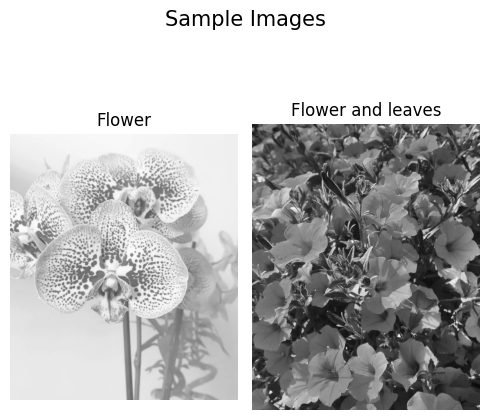

In [ ]:
fig,ax= plt.subplots(nrows=1,ncols=2,figsize=(5,5))

ax[0].imshow(cv.cvtColor(sample_11, cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].set_title('Flower')

ax[1].imshow(cv.cvtColor(sample_22, cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].set_title('Flower and leaves')

fig.suptitle('Sample Images', fontsize=15)
fig.tight_layout()
plt.show()

Now we will interate through this two dimensional array of Image and will make an array for the total number of pixels for each intensity of image from 0 to 255

In [ ]:
def pixel_intensity(img):
  intensity=np.arange(256)
  pixel=np.zeros(256)
  r,c=np.shape(img)
  for i in range(r):
    for j in range(c):
      pixel[img[i][j]]+=1
  return pixel

In [ ]:
def pdf_img(img):
  pixel_pdf=pixel_intensity(img)/np.sum(pixel_intensity(img))
  return pixel_pdf

In [ ]:
def cdf_img(img):
  pixel_pdf=pdf_img(img)
  pixel_cdf=np.cumsum(pixel_pdf)
  return pixel_cdf

Plot of Intensity and Number of Pixel for each Intensity in an Image

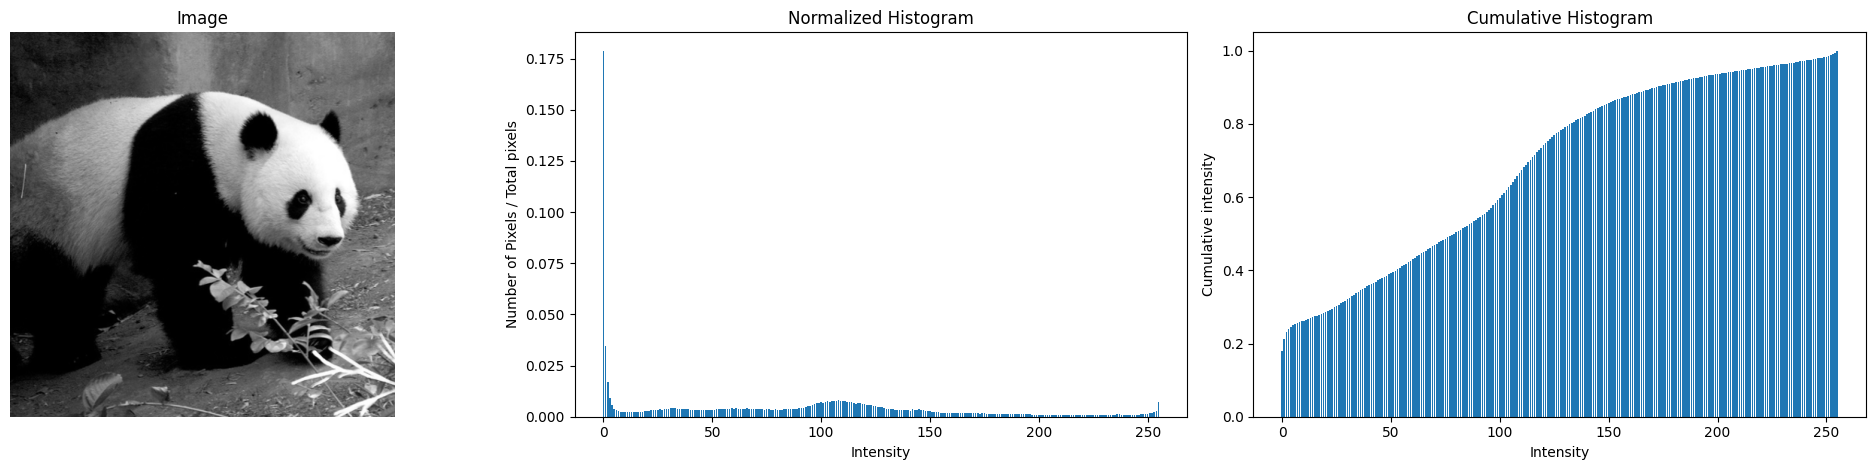

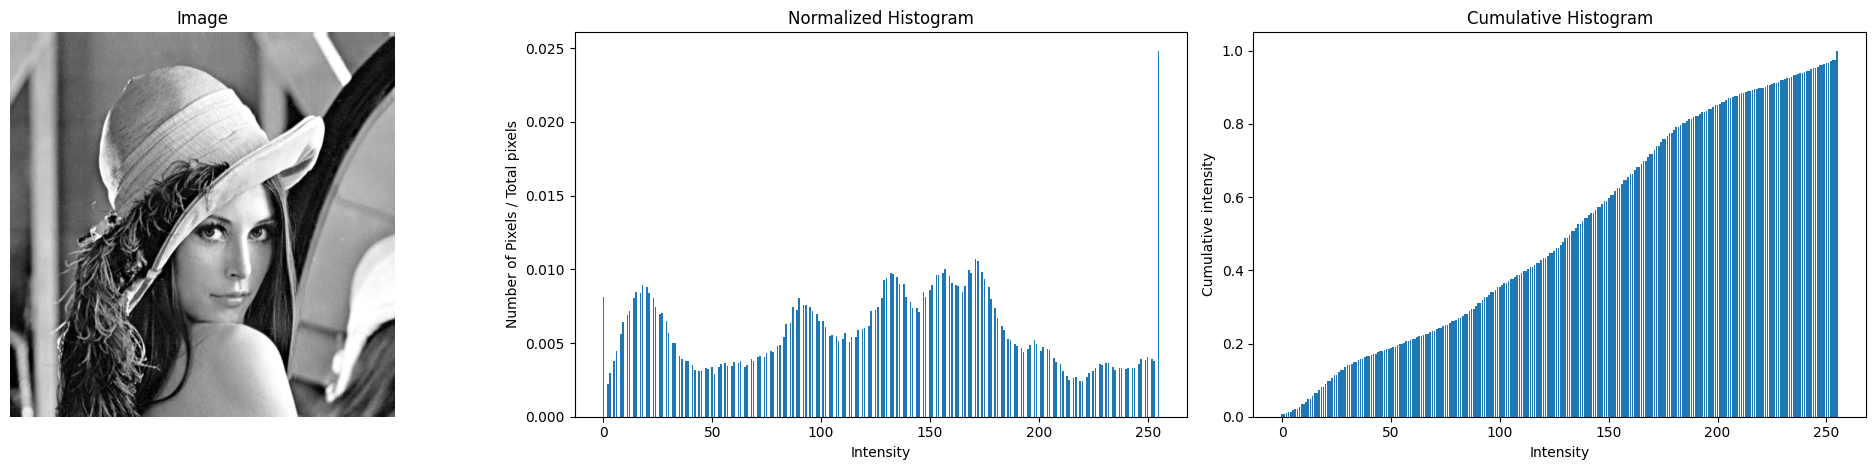

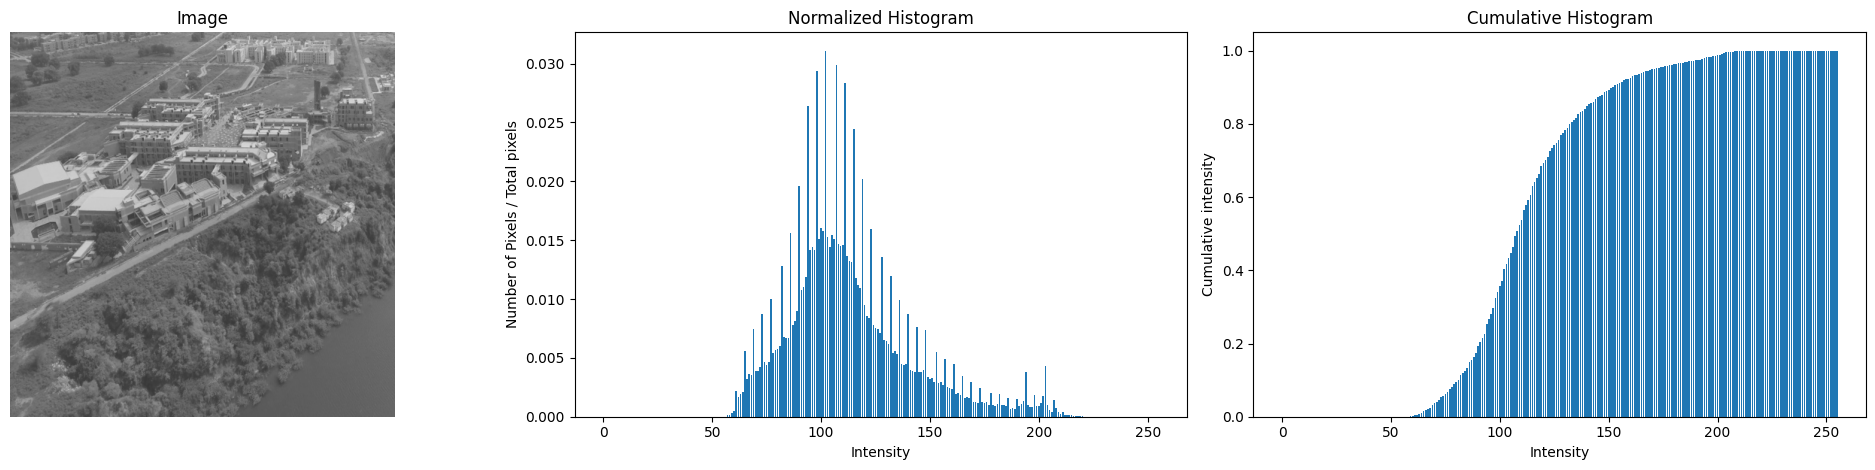

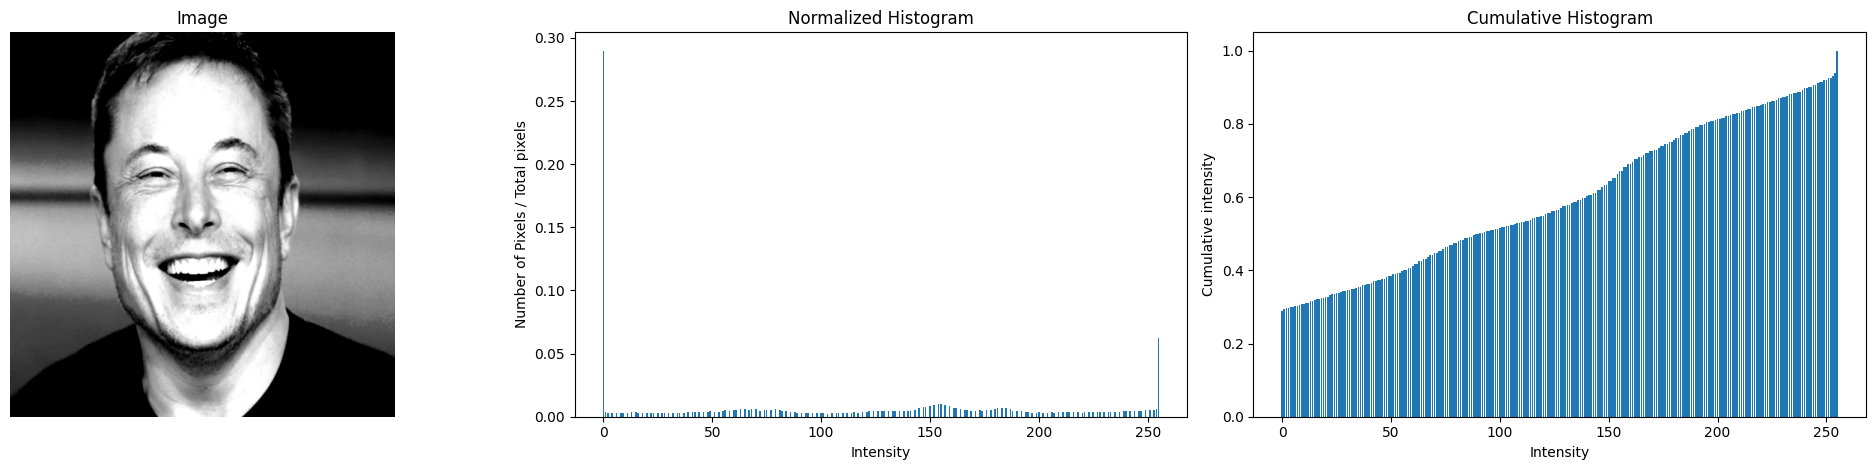

In [ ]:
def plot_cdf_pdf_img(img):
  pixel1=pdf_img(img)
  pixel2=cdf_img(img)
  fig, ax = plt.subplots(nrows=1, ncols=3)
  fig.set_figwidth(20)
  ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
  ax[0].axis('off')
  ax[0].set_title('Image')
  ax[1].bar(intensity_values,pixel1, width = 0.75)
  ax[1].set_title('Normalized Histogram')
  ax[1].set_xlabel('Intensity')
  ax[1].set_ylabel('Number of Pixels / Total pixels')
  ax[2].bar(intensity_values,pixel2, width = 0.75)
  ax[2].set_title('Cumulative Histogram')
  ax[2].set_xlabel('Intensity')
  ax[2].set_ylabel('Cumulative intensity')
  fig.tight_layout()
  plt.show()
plot_cdf_pdf_img(panda_1)
plot_cdf_pdf_img(girl_1)
plot_cdf_pdf_img(campus_1)
plot_cdf_pdf_img(elon_1)

For Sample Images

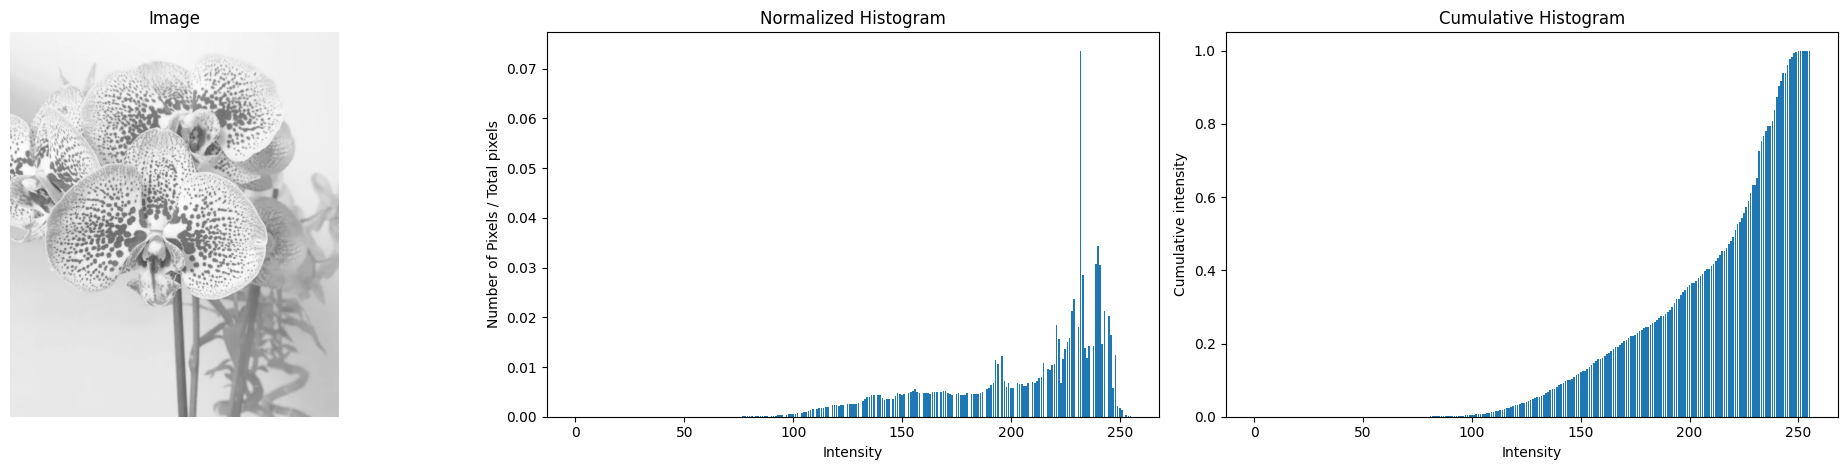

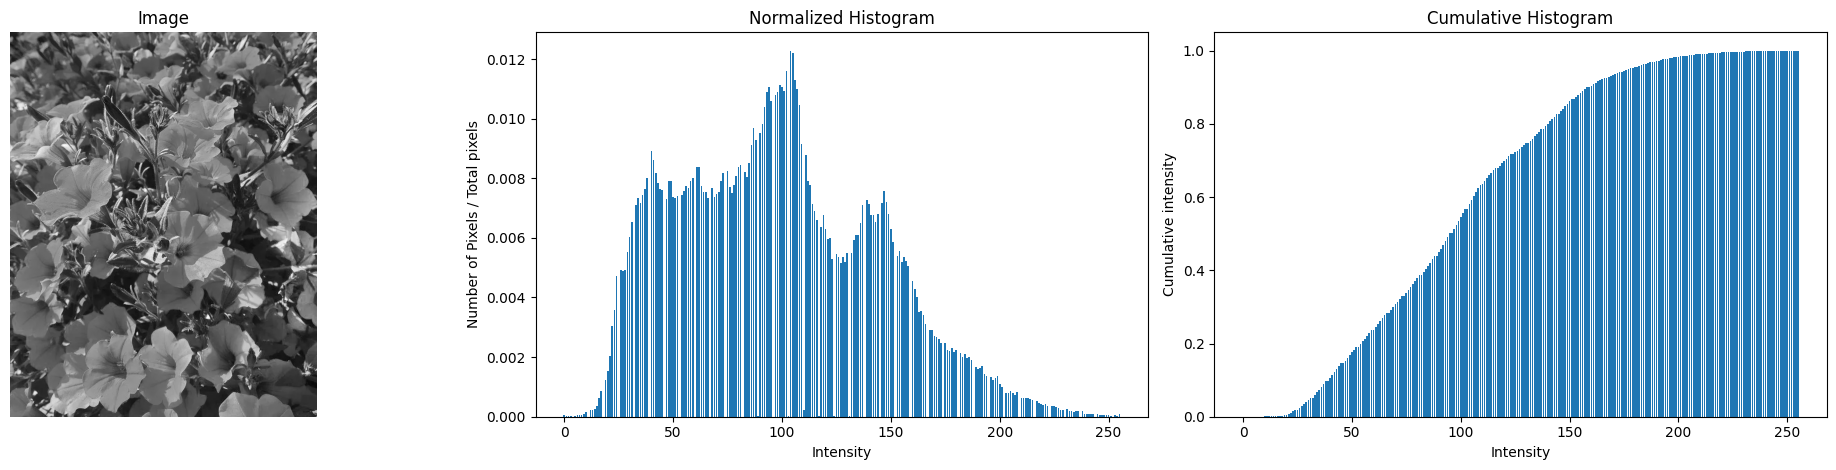

In [ ]:
def sample_plot_cdf_pdf_img(img):
  pixel1=pdf_img(img)
  pixel2=cdf_img(img)
  fig, ax = plt.subplots(nrows=1, ncols=3)
  fig.set_figwidth(20)
  ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
  ax[0].axis('off')
  ax[0].set_title('Image')
  ax[1].bar(intensity_values,pixel1, width = 0.75)
  ax[1].set_title('Normalized Histogram')
  ax[1].set_xlabel('Intensity')
  ax[1].set_ylabel('Number of Pixels / Total pixels')
  ax[2].bar(intensity_values,pixel2, width = 0.75)
  ax[2].set_title('Cumulative Histogram')
  ax[2].set_xlabel('Intensity')
  ax[2].set_ylabel('Cumulative intensity')
  fig.tight_layout()
  plt.show()
sample_plot_cdf_pdf_img(sample_11)
sample_plot_cdf_pdf_img(sample_22)

## **Histogram Equalization:**
In Histogram equalization we take image as

In [ ]:
def equalised(img):
  equ_intensity=cdf_img(img)*255
  equ_intensity=equ_intensity.round()
  return equ_intensity

In [ ]:
def equalised_img(img):
  equalised_=equalised(img)
  imge=np.full_like(img,0)
  l,c=np.shape(img)
  for o in range(l):
    for p in range(c):
      imge[o][p]=equalised_[img[o][p]]
  return imge

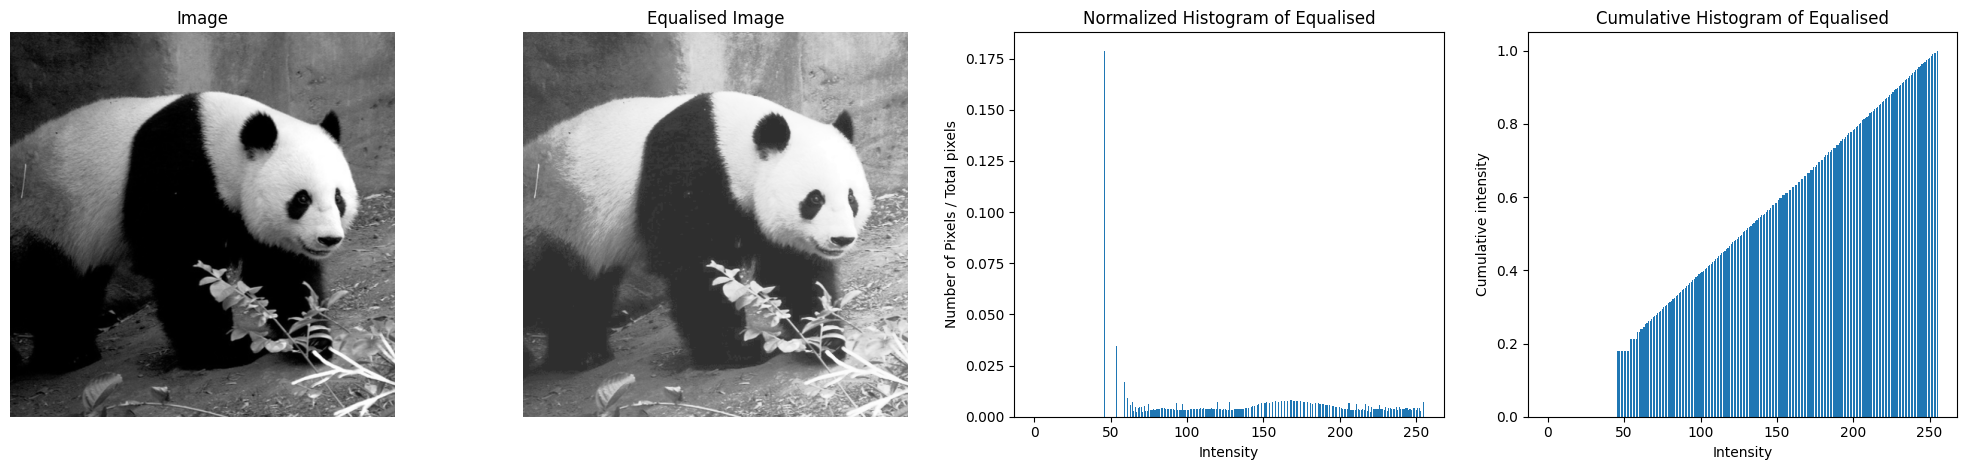

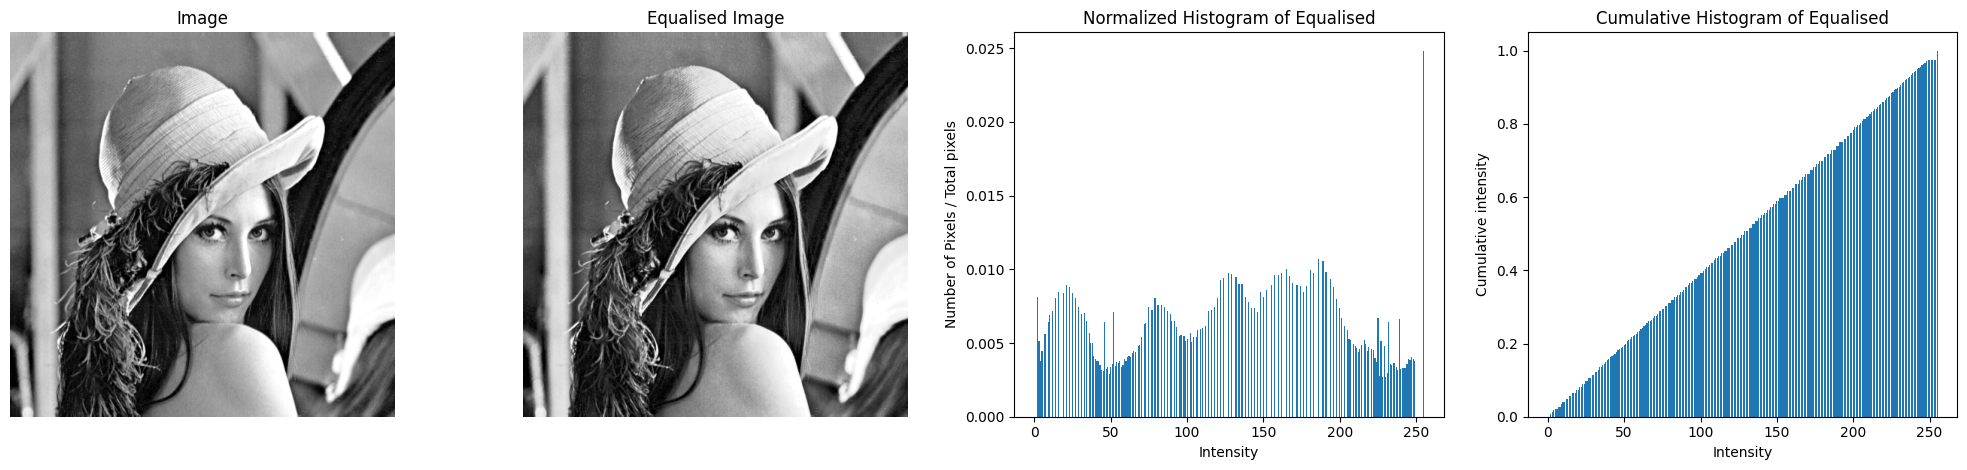

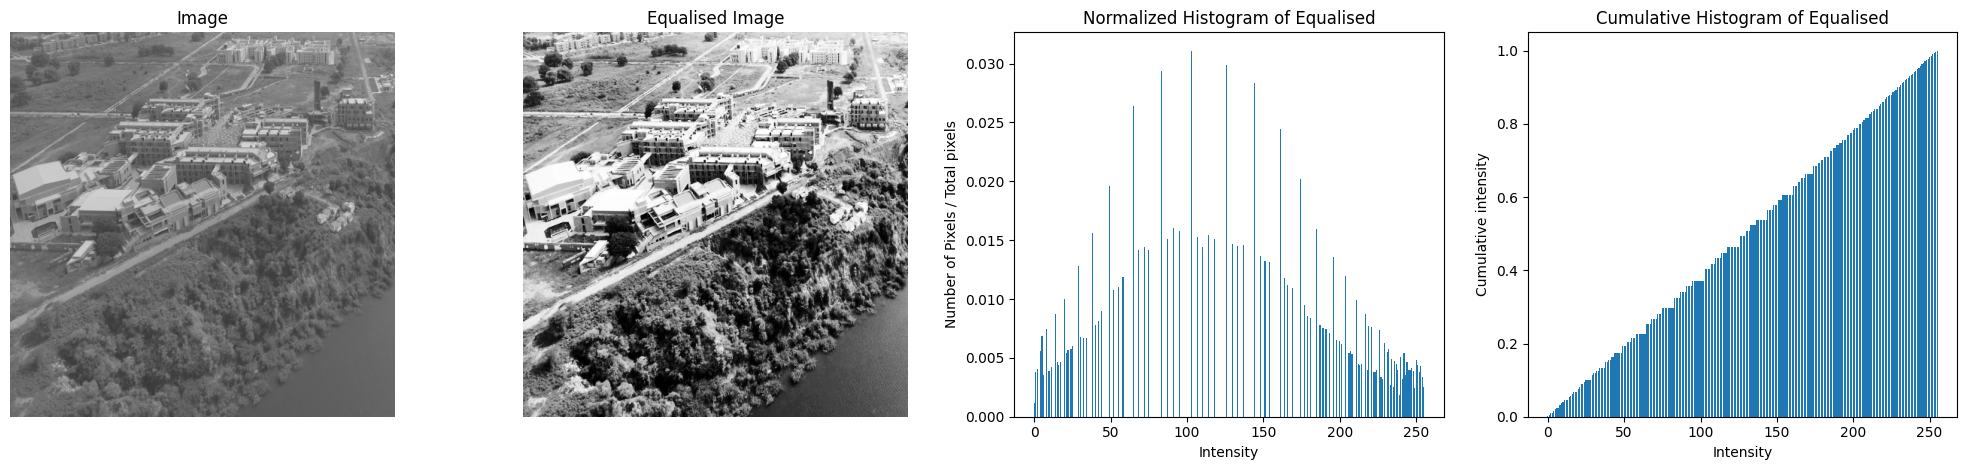

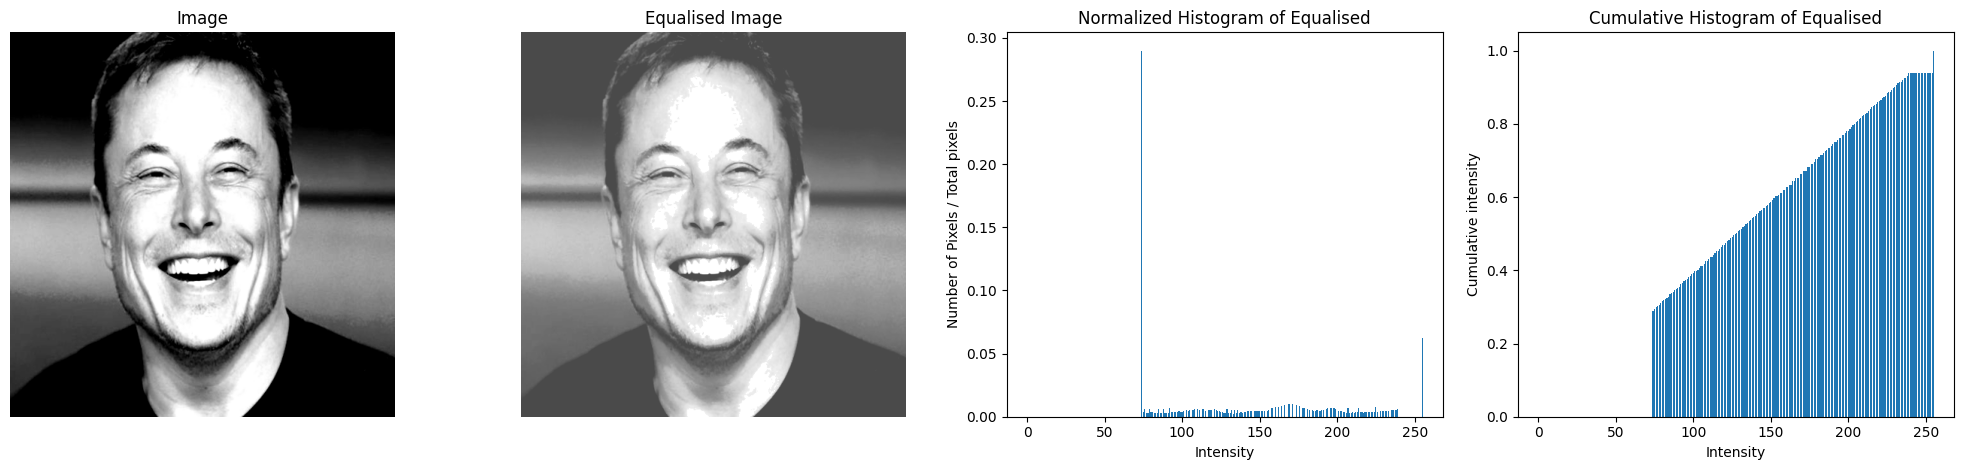

In [ ]:
def equalised_plot(img):
  equalised=equalised_img(img)
  cdf_equalised=cdf_img(equalised_img(img))
  fig,ax=plt.subplots(nrows=1,ncols=4)
  fig.set_figwidth(20)
  ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
  ax[0].axis('off')
  ax[0].set_title('Image')
  ax[1].imshow(cv.cvtColor(equalised, cv.COLOR_BGR2RGB))
  ax[1].axis('off')
  ax[1].set_title('Equalised Image')
  ax[2].bar(intensity_values,pdf_img(equalised), width = 0.75)
  ax[2].set_title('Normalized Histogram of Equalised')
  ax[2].set_xlabel('Intensity')
  ax[2].set_ylabel('Number of Pixels / Total pixels')
  ax[3].bar(intensity_values,cdf_equalised, width = 0.75)
  ax[3].set_title('Cumulative Histogram of Equalised')
  ax[3].set_xlabel('Intensity')
  ax[3].set_ylabel('Cumulative intensity')
  fig.tight_layout()
  plt.show()
equalised_plot(panda_1)
equalised_plot(girl_1)
equalised_plot(campus_1)
equalised_plot(elon_1)

In [ ]:
def matching_img(img1,img2):
  equalised1=cdf_img(equalised_img(img1))
  equalised2=cdf_img(equalised_img(img2))
  imge=equalised_img(img1)
  l,m=np.shape(imge)
  matched_list=[]
  for i in range(256):
    a=np.abs(equalised2-equalised1[i])
    b=np.argmin(a)
    matched_list.append(b)
  matched_img = np.full_like(imge,0,'uint8')
  for j in range(l):
    for k in range(m):
      matched_img[j,k] = matched_list[imge[j,k]]
  return matched_img

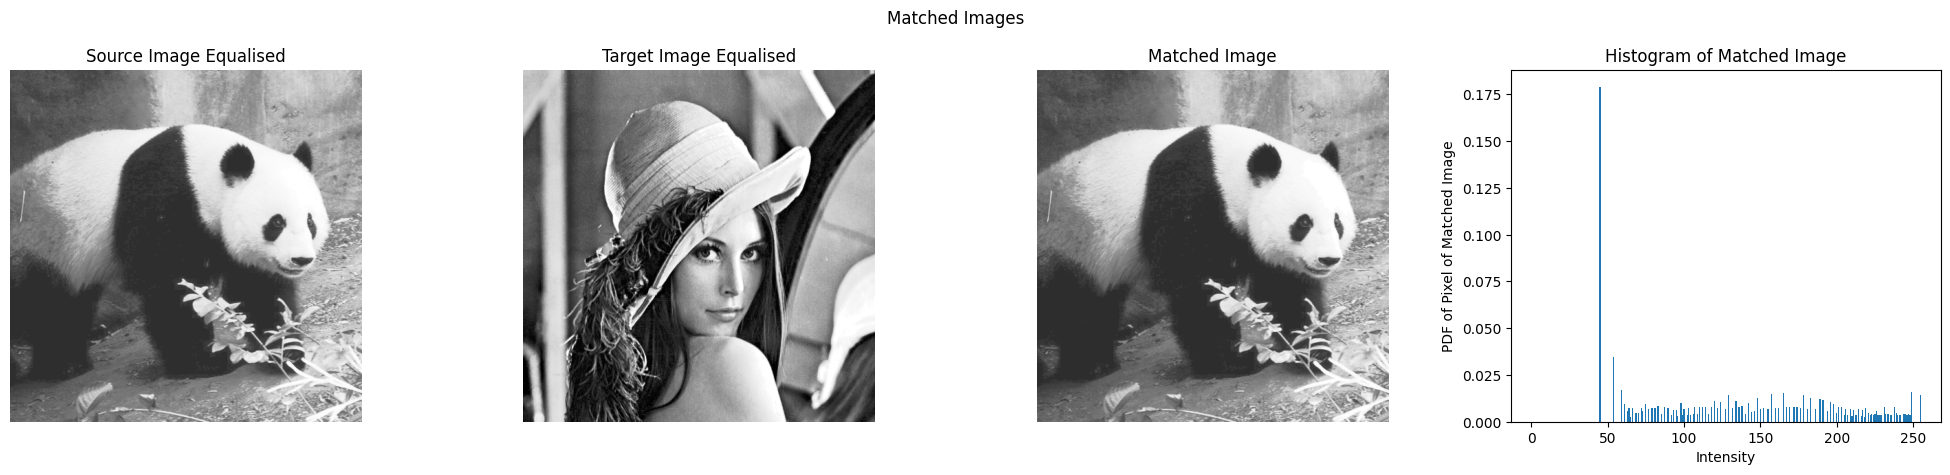

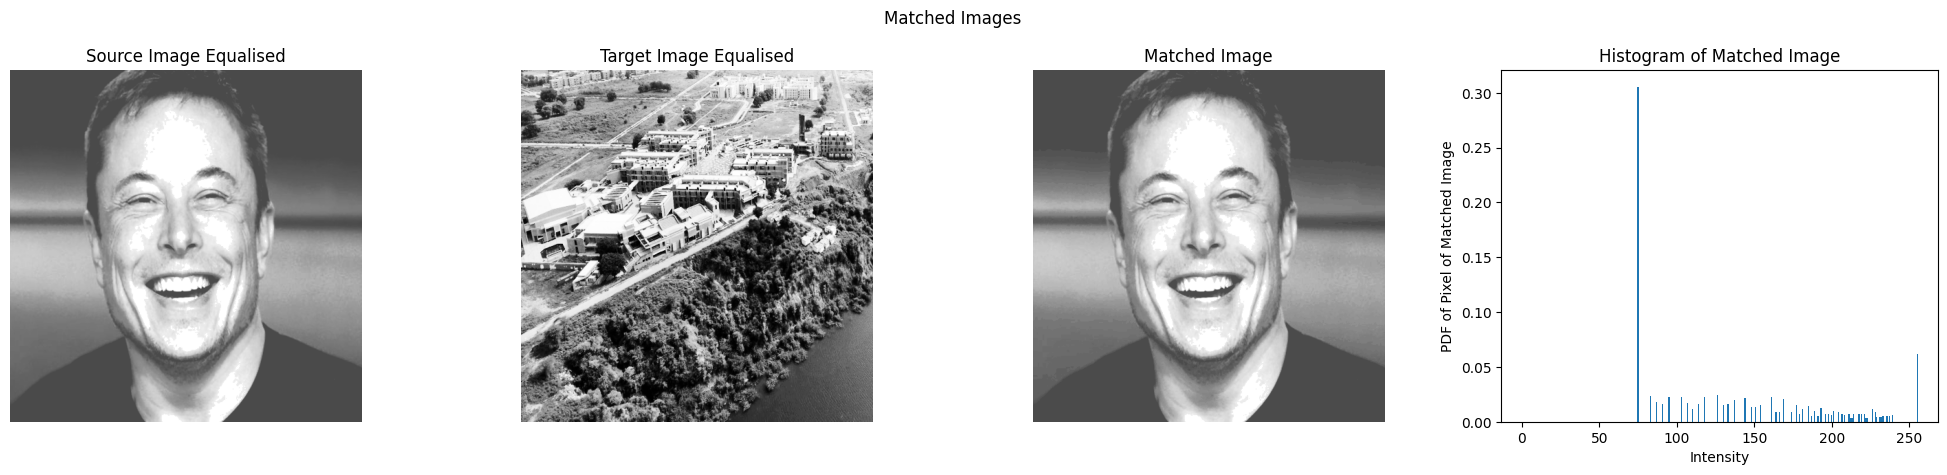

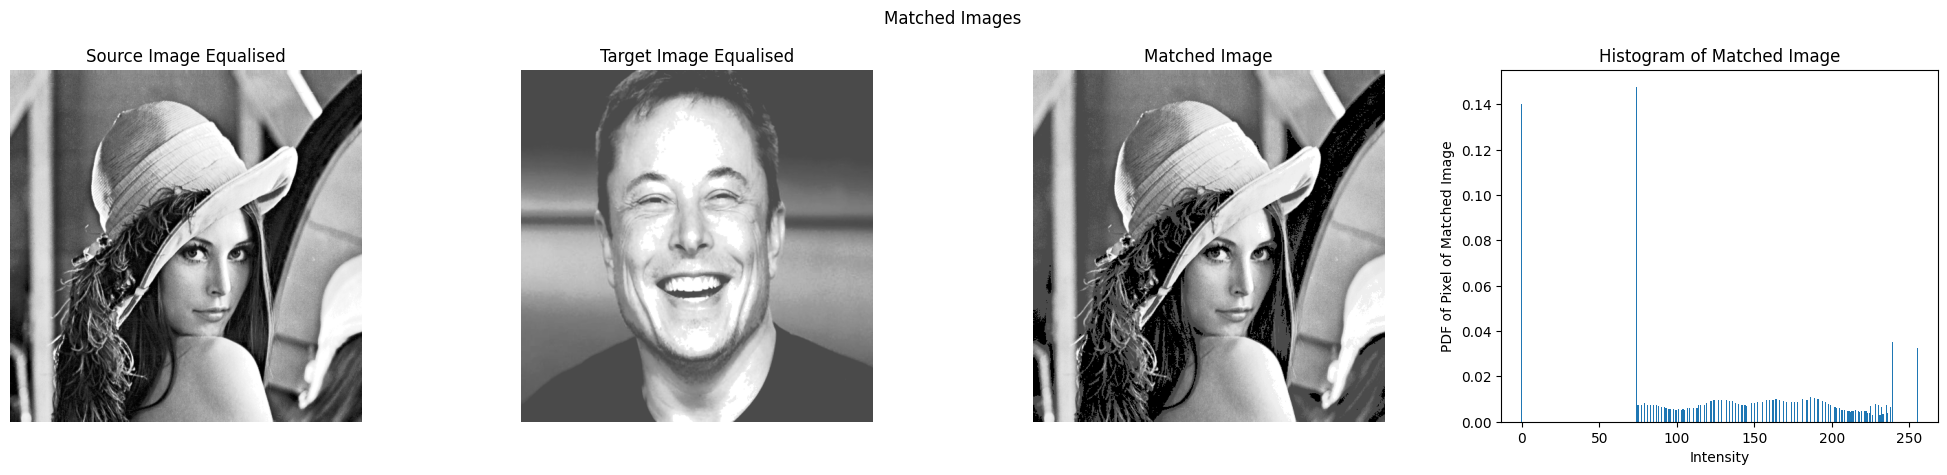

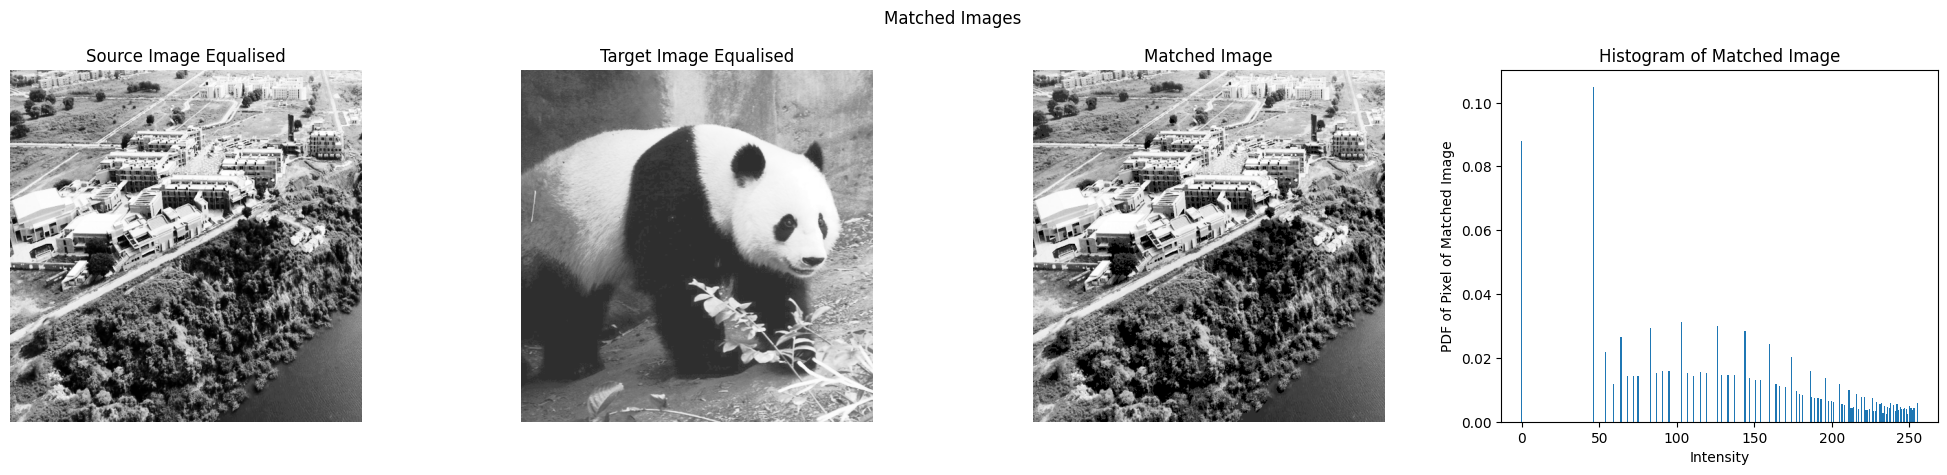

In [ ]:
def matching_plot(img1,img2):
  fig,ax=plt.subplots(nrows=1,ncols=4)
  fig.set_figwidth(20)
  ax[0].imshow(cv.cvtColor(equalised_img(img1), cv.COLOR_BGR2RGB))
  ax[0].axis('off')
  ax[0].set_title('Source Image Equalised')
  ax[1].imshow(cv.cvtColor(equalised_img(img2), cv.COLOR_BGR2RGB))
  ax[1].axis('off')
  ax[1].set_title('Target Image Equalised')
  ax[2].imshow(cv.cvtColor(matching_img(equalised_img(img1),equalised_img(img2)), cv.COLOR_BGR2RGB))
  ax[2].axis('off')
  ax[2].set_title('Matched Image')
  ax[3].bar(intensity_values,pdf_img(matching_img(img1,img2)), width = 0.75)
  ax[3].set_title('Histogram of Matched Image')
  ax[3].set_xlabel('Intensity')
  ax[3].set_ylabel('PDF of Pixel of Matched Image')
  fig.suptitle('Matched Equalised Images')
  fig.tight_layout()
  plt.show()
matching_plot(panda_1,girl_1)
matching_plot(elon_1,campus_1)
matching_plot(girl_1,elon_1)
matching_plot(campus_1,panda_1)

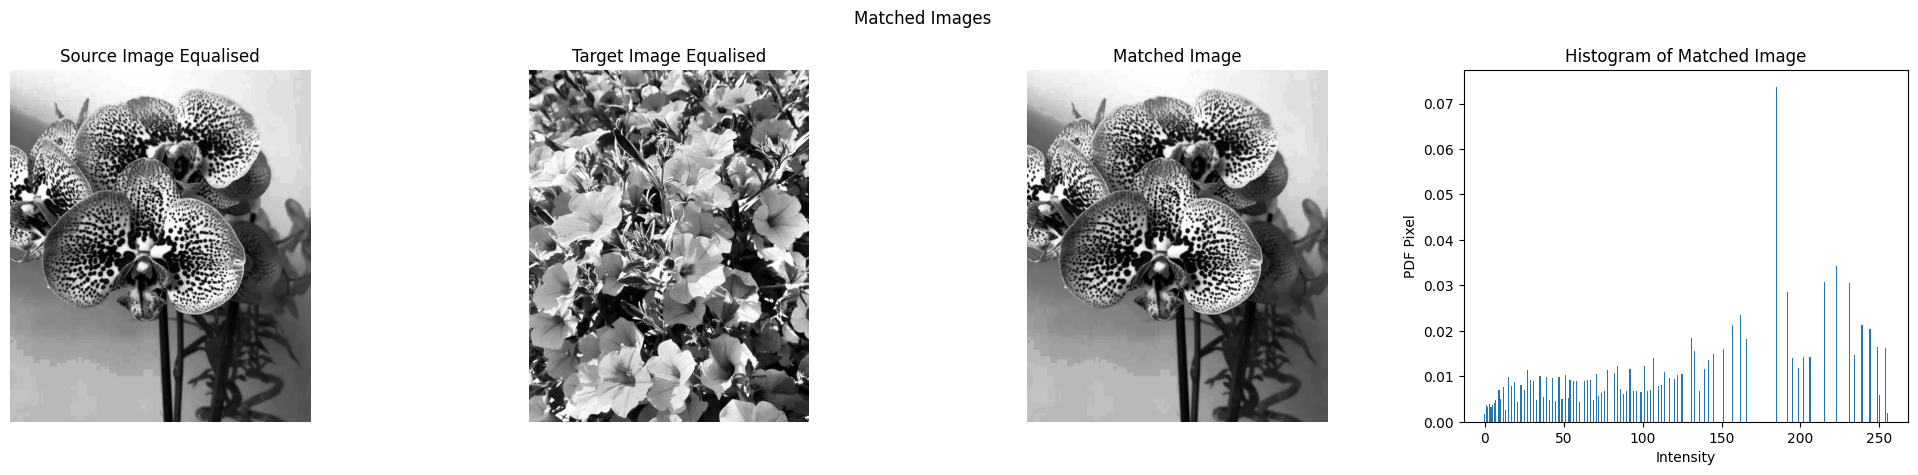

In [ ]:
matching_plot(sample_11,sample_22)

In [ ]:
def original_matching_img(img1,img2):
  equalised1=cdf_img(equalised_img(img1))
  equalised2=cdf_img(equalised_img(img2))
  l,m=np.shape(img1)
  matched_list=[]
  for i in range(256):
    a=np.abs(equalised2-equalised1[i])
    b=np.argmin(a)
    matched_list.append(b)
  matched_img = np.full_like(img1,0,'uint8')
  for j in range(l):
    for k in range(m):
      matched_img[j,k] = matched_list[img1[j,k]]
  return matched_img


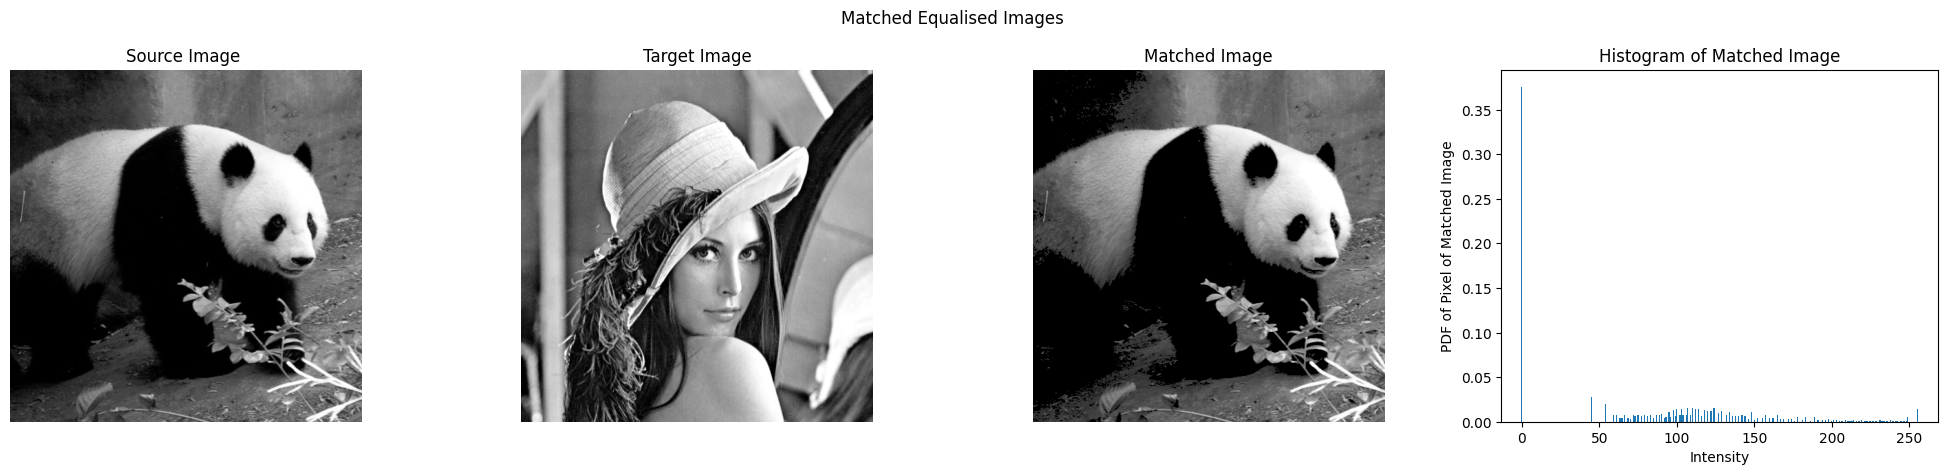

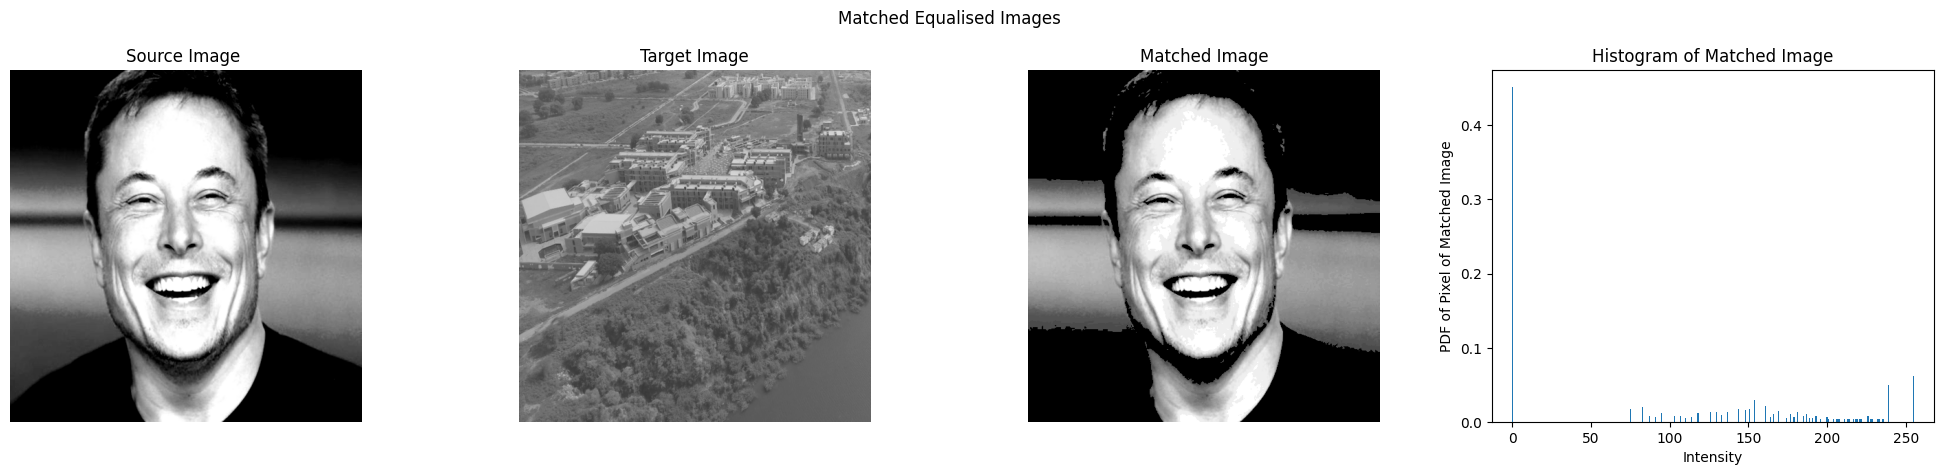

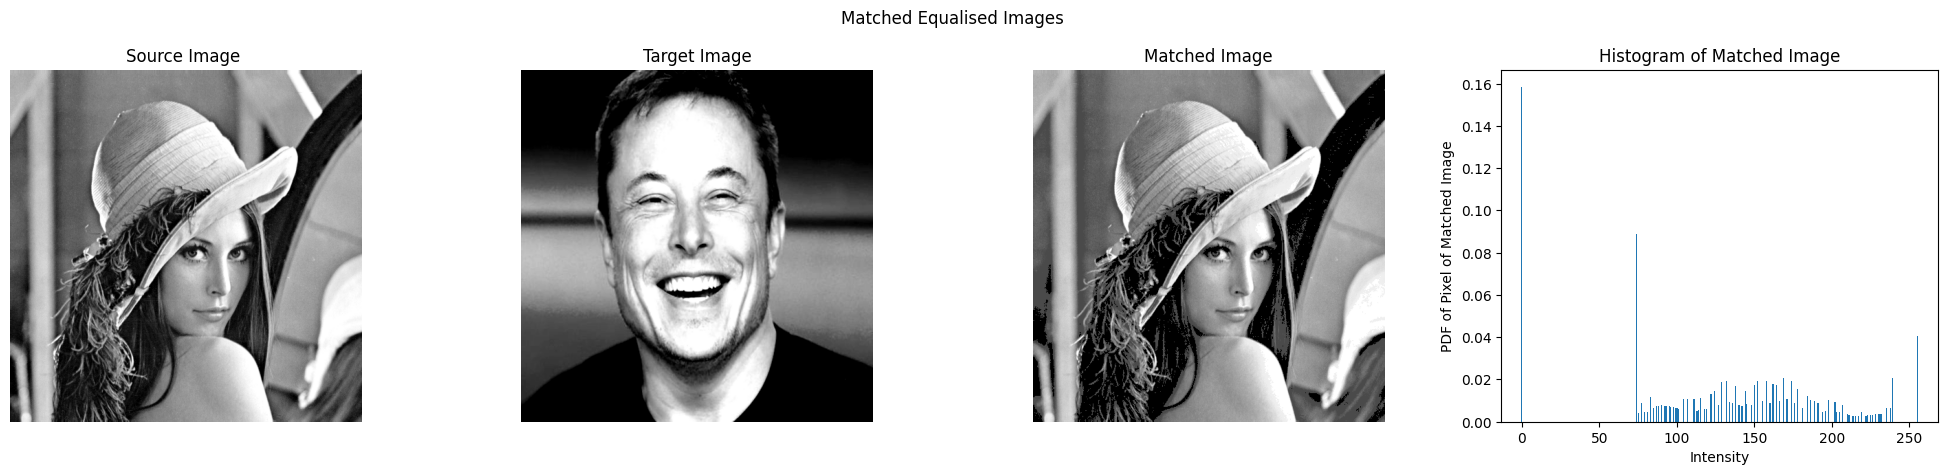

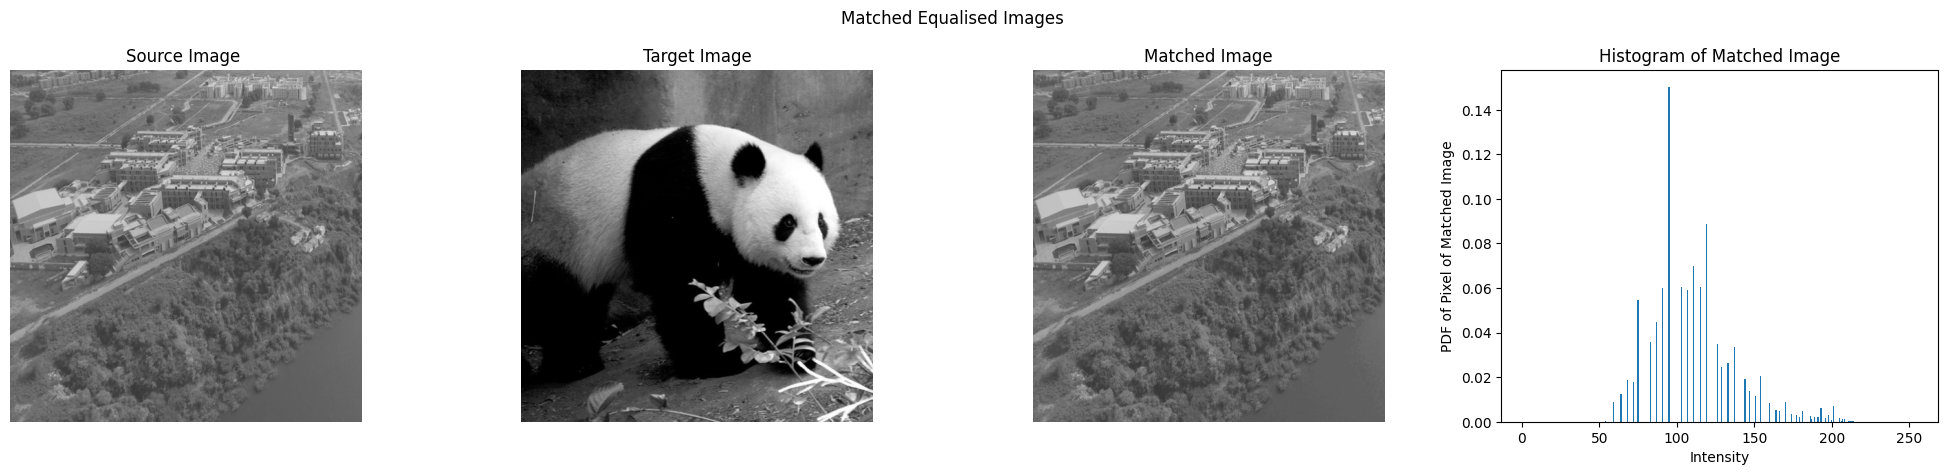

In [ ]:
def original_matching_plot(img1,img2):
  fig,ax=plt.subplots(nrows=1,ncols=4)
  fig.set_figwidth(20)
  ax[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
  ax[0].axis('off')
  ax[0].set_title('Source Image ')
  ax[1].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
  ax[1].axis('off')
  ax[1].set_title('Target Image')
  ax[2].imshow(cv.cvtColor(original_matching_img(img1,img2), cv.COLOR_BGR2RGB))
  ax[2].axis('off')
  ax[2].set_title('Matched Image')
  ax[3].bar(intensity_values,pdf_img(original_matching_img(img1,img2)), width = 0.75)
  ax[3].set_title('Histogram of Matched Image')
  ax[3].set_xlabel('Intensity')
  ax[3].set_ylabel('PDF of Pixel of Matched Image')
  fig.suptitle('Matched Equalised Images')
  fig.tight_layout()
  plt.show()
original_matching_plot(panda_1,girl_1)
original_matching_plot(elon_1,campus_1)
original_matching_plot(girl_1,elon_1)
original_matching_plot(campus_1,panda_1)

Discussed the assignment with:
Jakirat Singh Maskin, Ridham Patel, Harshil Shah, Harsh Jamgaonkar